In [20]:
using HDF5
using DelimitedFiles
using Plots; gr();
using Statistics

In [21]:
dir = "../data/base/test_changeprior_large2/"

"../data/base/test_changeprior_large2/"

In [84]:
upperres, h = readdlm(dir*"results-upper.csv", ',', header=true)

middleres, h = readdlm(dir*"results-middle.csv", ',', header=true)

lowerres, h = readdlm(dir*"results-lower.csv", ',', header=true)
h = h[:];

In [23]:
build_args = readdlm("$dir/inversion_options.csv", ',', header=false)
N = build_args[findfirst(isequal("num_invert"), build_args[:,1]),2]
M = build_args[findfirst(isequal("num_runs"), build_args[:,1]),2]

1000

In [86]:
function runs_means(comp, N, M)
    means = zeros(M,10)
    for run in 0:(M-1) 
        start = run*N + 1
        e = (run+1)*N
        means[run+1,:] .= mean(comp[start:e,:], dims=1)[:]
    end
    return means
end

si = findfirst(isequal("SiO2"), h)
upper_comp = upperres[:,si:si+9];
upper_means = runs_means(upper_comp, N, M)

mid_comp = middleres[:,si:si+9];
middle_means = runs_means(mid_comp, N, M)

low_comp = lowerres[:,si:si+9];
lower_means = runs_means(low_comp, N, M);

In [37]:
prior_means, _ = readdlm("$dir/model_info.csv", ',', header=true)
prior_means = prior_means[:];

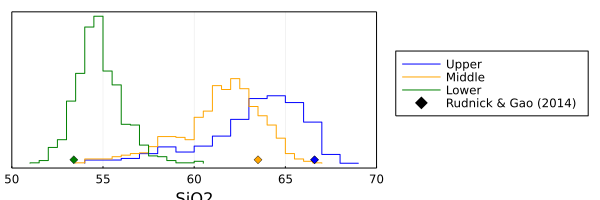

In [129]:
colors = [:blue, :orange, :green]

stephist(upper_means[:,1], c=colors[1], normalize=:pdf, label="Upper")
stephist!(middle_means[:,1], c=colors[2], normalize=:pdf, label="Middle")
stephist!(lower_means[:,1], c=colors[3], normalize=:pdf, label="Lower")
#stephist!(prior_means, alpha=.5)
scatter!([66.6], [1/100], c=:black, shape=:diamond, label="Rudnick & Gao (2014)", legend=:outerright)
scatter!([66.6], [1/100], c=colors[1], label=false, shape=:diamond)
scatter!([63.5], [1/100], c=colors[2], label=false, shape=:diamond)
scatter!([53.4], [1/100], c=colors[3], label=false, shape=:diamond)

plot!(yticks=false, framestyle=:box, xlabel="SiO2", size=(600, 200),
     xlims=(50.0, 70))

#savefig("../../thesis/figures/mod_prior_test.pdf")

In [52]:
orig_prior, _ = readdlm("../resources/bsr_ignmajors_1.csv", ',', header=true)
orig_prior_mean = mean(orig_prior[:,2])

58.67910944210001

51.26836138766175


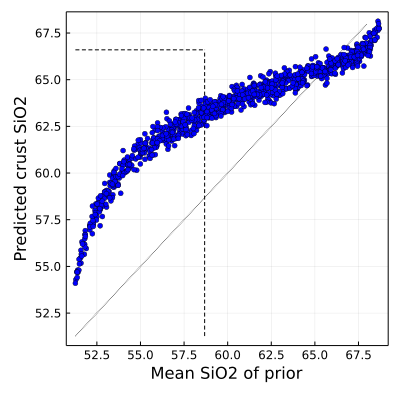

In [123]:
left_min = minimum(prior_means)
println(left_min)

plot([left_min, orig_prior_mean], [66.6, 66.6], color=:black, linestyle=:dash)
plot!([orig_prior_mean, orig_prior_mean],[left_min,66.6], color=:black, linestyle=:dash)
plot!([left_min,68],[left_min,68], linestyle=:dot, color=:black)
scatter!(prior_means, upper_means[:,1], legend=false, markersize=3, 
    markerstrokewidth=.5, color=colors[1],size=(400, 400),
    linewidth=0, framestyle=:box, xlabel="Mean SiO2 of prior", ylabel="Predicted crust SiO2")
#savefig("../../thesis/figures/upper_prior_mod.png")

51.26836138766175


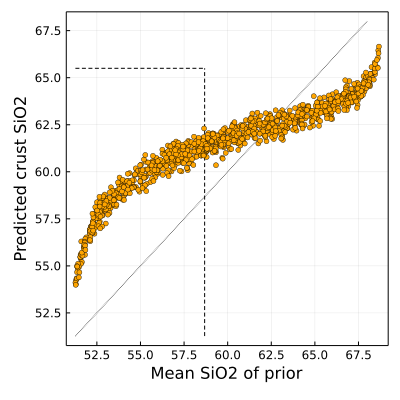

In [125]:
left_min = minimum(prior_means)
println(left_min)
target = 65.5

plot([left_min, orig_prior_mean], [target, target], color=:black, linestyle=:dash)
plot!([orig_prior_mean, orig_prior_mean],[left_min,target], color=:black, linestyle=:dash)
plot!([left_min,68],[left_min,68], linestyle=:dot, color=:black)
scatter!(prior_means, middle_means[:,1], legend=false, markersize=3, 
    markerstrokewidth=.5, color=colors[2],size=(400, 400),
    linewidth=0, framestyle=:box, xlabel="Mean SiO2 of prior", ylabel="Predicted crust SiO2")

#savefig("../../thesis/figures/middle_prior_mod.png")

51.26836138766175


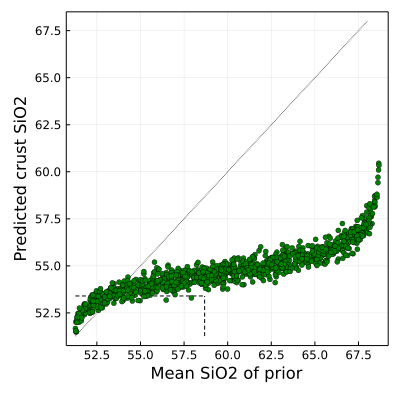

In [127]:
left_min = minimum(prior_means)
println(left_min)
target = 53.4

plot([left_min, orig_prior_mean], [target, target], color=:black, linestyle=:dash)
plot!([orig_prior_mean, orig_prior_mean],[left_min,target], color=:black, linestyle=:dash)
plot!([left_min,68],[left_min,68], linestyle=:dot, color=:black)
scatter!(prior_means, lower_means[:,1], legend=false, markersize=3, 
    markerstrokewidth=.5, color=colors[3],size=(400, 400),
    framestyle=:box, xlabel="Mean SiO2 of prior", ylabel="Predicted crust SiO2")

#savefig("../../thesis/figures/lower_prior_mod.png")